In [1]:
import pandas
import numpy
from sklearn import datasets

# Package des warnings pour les éviter plus tard
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

iris = datasets.load_iris()
x_iris = iris.data
y_iris = iris.target
x_df_iris = pandas.DataFrame(iris.data, columns = iris.feature_names)
y_df_iris = pandas.DataFrame(iris.target, columns = ['class'])
y_sr_iris = y_df_iris['class']

In [2]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression,f_classif, RFE

print(x_iris.shape)
x_new1 = SelectKBest(chi2, k = 1).fit_transform(x_iris, y_iris)
print(x_new1.shape)

(150, 4)
(150, 1)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def regression_logistique (x, y):
    logreg = LogisticRegression(max_iter = 10000)
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    logreg.fit(x_train, y_train)
    
    # Prédiction
    y_pred = logreg.predict(x_test)
    return logreg.score(x_test, y_test)

In [4]:
regression_logistique(x_new1, y_iris)

0.9210526315789473

In [5]:
MSE_values=[]
for i in range(1, x_iris.shape[1] + 1):
    x_new2 = SelectKBest(f_classif, i).fit_transform(x_iris, y_iris)
    mse = regression_logistique(x_new2, y_iris)
    MSE_values.append(mse)
    print(i, mse)

1 0.9736842105263158
2 0.868421052631579
3 0.9473684210526315
4 0.9736842105263158


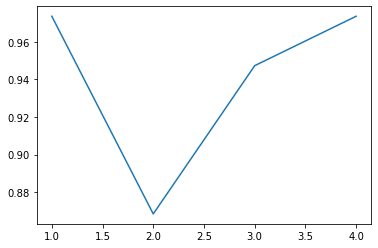

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(1, x_iris.shape[1] + 1), MSE_values);

In [7]:
boston = datasets.load_boston()
x_bst = boston.data
y_bst = boston.target
x_df_bst = pandas.DataFrame(boston.data, columns = boston.feature_names)
y_df_bst = pandas.DataFrame(boston.target, columns = ['MEDV'])
y_sr_bst = y_df_bst['MEDV']

x_df_bst.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
selector = SelectKBest(score_func = f_regression, k = 3)
selector.fit(x_df_bst,y_bst)
cols = selector.get_support(indices = True)
cols

array([ 5, 10, 12], dtype=int64)

In [9]:
x_df_bst_new = x_df_bst.iloc[:,cols]
x_df_bst_new.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def regression_lineaire (x, y):
    linreg = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)
    linreg.fit(x_train, y_train)
    
    # Prédiction
    y_pred = linreg.predict(x_test)
    return numpy.sqrt(mean_squared_error(y_test, y_pred))

In [11]:
# Application de la régression linéaire
regression_lineaire(x_bst, y_bst)

4.679504823808757

In [12]:
# Application de la régression linéaire
regression_lineaire(x_df_bst_new, y_df_bst)

5.258719364166146

In [13]:
for i in range(1,x_bst.shape[1]+1):
    x_new = SelectKBest(f_regression, i).fit_transform(x_bst, y_bst)
    x_new = pandas.DataFrame(x_new)
    x_new.head()
    print(i, regression_lineaire(x_new, y_bst))

1 6.803413064032845
2 5.56508267841118
3 5.258719364166149
4 5.258446562218219
5 5.22331433468974
6 5.30458218557125
7 5.330040669202938
8 5.169063587952267
9 5.146532688078733
10 5.147161721971872
11 5.011762121690917
12 4.714703641445915
13 4.679504823808768


In [14]:
x_df_bst2 = x_df_bst.copy()
x_df_bst2['MEDV'] = y_bst
cor = x_df_bst2.corr()

# Corrélation
cor_target = abs(cor["MEDV"])
cor_target

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [15]:
selected_features = list(cor_target[cor_target > 0.5].index)
selected_features = selected_features[:-1]
selected_features

['RM', 'PTRATIO', 'LSTAT']

In [16]:
x_df_bst3 = x_df_bst.loc[:,selected_features]

# Application de la régression linéaire
regression_lineaire(x_df_bst3, y_bst)

5.258719364166146

In [17]:
# Package du discriminant
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
x_new3 = lda.fit_transform(x_iris, y_iris)
print(x_new3.shape)
print(regression_lineaire(x_new3, y_iris))

(150, 2)
0.21780798831846374


In [18]:
MSE_values=[]
for i in range(1, x_new3.shape[1] + 1):
    x_new4 = SelectKBest(f_classif, i).fit_transform(x_new3, y_iris)
    mse = regression_lineaire(x_new4, y_iris)
    MSE_values.append(mse)
    print(i, mse)

1 0.246097992043711
2 0.21780798831846374
